In [2]:
import datetime

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] =16

Results by gender: `wget -O pontevedraduses19hfa_sprint_gender_en.xlsx "https://www.evochip.hu/results/xlsgen.php?eventid=PontevedraDuSES19HFa&lang=en&distance=sprint"`

In [616]:
def make_timedelta(s):
    # Handle time deltas
    # Needs hours specifier, if not already there
    mask = s.str.count(':') == 1
    pre = s.copy()
    pre[mask] = '00:'
    pre[~mask] = ''
    return pd.to_timedelta(pre+s, unit='s').astype('timedelta64[s]')

def sanitise_df(df):
    df['CategoryRank'] = df['CategoryRank'].astype('int')
    df['Country'] = df['Country'].astype('category')
    df['Run1'] = make_timedelta(df['Run1'])
    df['T1'] = make_timedelta(df['T1'])
    df['Bike'] = make_timedelta(df['Bike'])
    df['T2'] = make_timedelta(df['T2'])
    df['Run2'] = make_timedelta(df['Run2'])
    df['Total'] = make_timedelta(df['Total'])
    df['Run1Pace'] = df['Run1']/(60*5)
    df['Run2Pace'] = df['Run2']/(60*2.5)
    df['Run12Ratio'] = df['Run1Pace']/df['Run2Pace']

In [607]:
# col_inds = [0, 1, 2, 3, 7, 9, 10, 11, 12, 13, 14]
# col_names = ['Rank', 'CategoryRank', 'Bib', 'Name', 'Country', 'Run1', 'T1', "Bike", "T2", "Run2", "Total"]

In [608]:
# df_f = pd.read_excel("pontevedraduses19hfa_sprint_gender_en.xlsx", header=4, nrows=206-4, usecols=col_inds, names=col_names).dropna()
# df_m = pd.read_excel("pontevedraduses19hfa_sprint_gender_en.xlsx", header=4, skiprows=205, nrows=424, usecols=col_inds, names=col_names).dropna()

In [609]:
# sanitise_df(df_f)
# sanitise_df(df_m)

In [610]:
ag_col_inds = [0, 1, 2, 6, 8, 9, 10, 11, 12, 13]
ag_col_names = ['CategoryRank', 'Bib', 'Name', 'Country', 'Run1', 'T1', "Bike", "T2", "Run2", "Total"]

Results by category: `wget -O pontevedraduses19hfa_sprint_cat_en.xlsx "https://www.evochip.hu/results/xlscat.php?eventid=PontevedraDuSES19HFa&lang=en&distance=sprint"`

Then convert XLSX to CSV.

Split big CSV into AG ones with: `csplit --suppress-matched --suffix-format='%02d.csv' -f AG pontevedraduses19hfa_sprint_cat_en.csv '/^,,,,,,,,,,,,,/' '{*}'`

In [611]:
ag_files = {
'AG01.csv' : '16-19 Female',
'AG02.csv' : '16-19 Male',
'AG03.csv' : '20-24 Female',
'AG04.csv' : '20-24 Male',
'AG05.csv' : '25-29 Female',
'AG06.csv' : '25-29 Male',
'AG07.csv' : '30-34 Female',
'AG08.csv' : '30-34 Male',
'AG09.csv' : '35-39 Female',
'AG10.csv' : '35-39 Male',
'AG11.csv' : '40-44 Female',
'AG12.csv' : '40-44 Male',
'AG13.csv' : '45-49 Female',
'AG14.csv' : '45-49 Male',
'AG15.csv' : '50-54 Female',
'AG16.csv' : '50-54 Male',
'AG17.csv' : '55-59 Female',
'AG18.csv' : '55-59 Male',
'AG19.csv' : '60-64 Female',
'AG20.csv' : '60-64 Male',
'AG21.csv' : '65-69 Female',
'AG22.csv' : '65-69 Male',
'AG23.csv' : '70-74 Female',
'AG24.csv' : '70-74 Male',
'AG25.csv' : '75-79 Female',
'AG26.csv' : '75-79 Male',
'AG27.csv' : '80-84 Female',
'AG28.csv' : '80-84 Male',
'AG29.csv' : '85-89 Male',
'AG30.csv' : 'Open Female',
'AG31.csv' : 'Open Male',
}

Get & store dataframes for each CSV/category. Combine male & female separately, rank by total time.

In [688]:
ag_dfs = {}
for k, v in ag_files.items():
#     print(k)
    this_df = pd.read_csv(k, header=1, usecols=ag_col_inds, names=ag_col_names).dropna(subset=['CategoryRank', 'Run1', 'T1', 'Bike', 'T2', 'Run2', 'Total'])
    sanitise_df(this_df)
    this_df['Category'] = v
    this_df['Category'] = this_df['Category'].astype('category')
    this_df['Run1Delta'] = this_df['Run1'] - this_df['Run1'][0]
    this_df['BikeDelta'] = this_df['Bike'] - this_df['Bike'][0]
    this_df['Run2Delta'] = this_df['Run2'] - this_df['Run2'][0]
    ag_dfs[v] = this_df

df_m = pd.concat([ag_dfs[k] for k in ag_dfs if ' Male' in k]).reset_index(drop=True).sort_values('Total').reset_index(drop=True)
df_m['Rank'] = df_m.index + 1

df_f = pd.concat([ag_dfs[k] for k in ag_dfs if 'Female' in k]).reset_index(drop=True).sort_values('Total').reset_index(drop=True)
df_f['Rank'] = df_f.index + 1

In [689]:
df_m.head()

,CategoryRank,Bib,Name,Country,Run1,T1,Bike,T2,Run2,Total,Run1Pace,Run2Pace,Run12Ratio,Category,Run1Delta,BikeDelta,Run2Delta,Rank
0,1,1024,Bienvenido Ballester Martinez,ESP,966.0,41.0,1903.0,78.0,497.0,3482.0,3.220000,3.313333,0.971831,20-24 Male,0.0,0.0,0.0,1
1,1,1055,Jonatan Perez Lopez,ESP,963.0,43.0,1899.0,73.0,508.0,3483.0,3.210000,3.386667,0.947835,25-29 Male,0.0,0.0,0.0,2
2,2,1056,Xabier Tijero Santillan,ESP,965.0,40.0,1895.0,80.0,505.0,3483.0,3.216667,3.366667,0.955446,25-29 Male,2.0,-4.0,-3.0,3
3,2,1038,Alejandro Said Bonilla Narvaez,MEX,977.0,38.0,1893.0,76.0,507.0,3490.0,3.256667,3.380000,0.963511,20-24 Male,11.0,-10.0,10.0,4
4,3,1053,Javier Marco Estruc,ESP,964.0,47.0,1898.0,78.0,518.0,3502.0,3.213333,3.453333,0.930502,25-29 Male,1.0,-1.0,10.0,5


In [618]:
df_f.head()

,CategoryRank,Bib,Name,Country,Run1,T1,Bike,T2,Run2,Total,Run1Pace,Run2Pace,Run12Ratio,Category,Rank
0,1,1618,Aida Garcia Lopez,ESP,1151.0,49.0,2055.0,90.0,640.0,3983.0,3.836667,4.266667,0.899219,45-49 Female,1
1,1,1591,Margo Mackintosh,AUS,1101.0,61.0,2163.0,83.0,606.0,4012.0,3.670000,4.040000,0.908416,35-39 Female,2
2,2,1625,Gwen Kinsey,GBR,1148.0,51.0,2129.0,84.0,636.0,4046.0,3.826667,4.240000,0.902516,45-49 Female,3
3,1,1529,Narda Cuen Chavez,MEX,1145.0,48.0,2250.0,79.0,619.0,4139.0,3.816667,4.126667,0.924879,20-24 Female,4
4,1,1608,Melisa Christian,USA,1150.0,64.0,2230.0,87.0,611.0,4140.0,3.833333,4.073333,0.941080,40-44 Female,5


In [666]:
df_f[df_f['Name'] == "Charlotte Bermingham"]

,CategoryRank,Bib,Name,Country,Run1,T1,Bike,T2,Run2,Total,Run1Pace,Run2Pace,Run12Ratio,Category,Rank
72,12,1546,Charlotte Bermingham,GBR,1262.0,80.0,2434.0,114.0,690.0,4578.0,4.206667,4.6,0.914493,30-34 Female,73


In [667]:
df_f[df_f['Category'] == "30-34 Female"]

,CategoryRank,Bib,Name,Country,Run1,T1,Bike,T2,Run2,Total,Run1Pace,Run2Pace,Run12Ratio,Category,Rank
13,1,1550,Emily Purbrick,GBR,1235.0,45.0,2166.0,86.0,670.0,4200.0,4.116667,4.466667,0.921642,30-34 Female,14
18,2,1553,Astrid Isabel Lopez Marin,MEX,1193.0,65.0,2194.0,93.0,675.0,4218.0,3.976667,4.500000,0.883704,30-34 Female,19
20,3,1551,Rebecca York,GBR,1241.0,54.0,2159.0,88.0,680.0,4219.0,4.136667,4.533333,0.912500,30-34 Female,21
25,4,1568,Inês Moreira,POR,1193.0,54.0,2200.0,128.0,672.0,4244.0,3.976667,4.480000,0.887649,30-34 Female,26
31,5,1555,Jana Mozolaniova,SVK,1196.0,72.0,2267.0,95.0,644.0,4273.0,3.986667,4.293333,0.928571,30-34 Female,32
32,6,1561,Ana Carolina Araujo,BRA,1236.0,62.0,2234.0,88.0,660.0,4278.0,4.120000,4.400000,0.936364,30-34 Female,33
40,7,1563,Elizabeth Berton,BRA,1237.0,53.0,2238.0,97.0,685.0,4309.0,4.123333,4.566667,0.902920,30-34 Female,41
47,8,1547,Lucy Burn,GBR,1273.0,60.0,2286.0,87.0,708.0,4412.0,4.243333,4.720000,0.899011,30-34 Female,48
51,9,1548,Laura Campbell-Adams,GBR,1292.0,69.0,2266.0,99.0,698.0,4422.0,4.306667,4.653333,0.925501,30-34 Female,52
70,10,1567,Courtenay Smart,CAN,1249.0,68.0,2460.0,100.0,690.0,4565.0,4.163333,4.600000,0.905072,30-34 Female,71


In [619]:
df_m.dtypes

CategoryRank      int64
Bib               int64
Name             object
Country          object
Run1            float64
T1              float64
Bike            float64
T2              float64
Run2            float64
Total           float64
Run1Pace        float64
Run2Pace        float64
Run12Ratio      float64
Category         object
Rank              int64
dtype: object

In [620]:
m_col = 'royalblue'
f_col = 'limegreen'

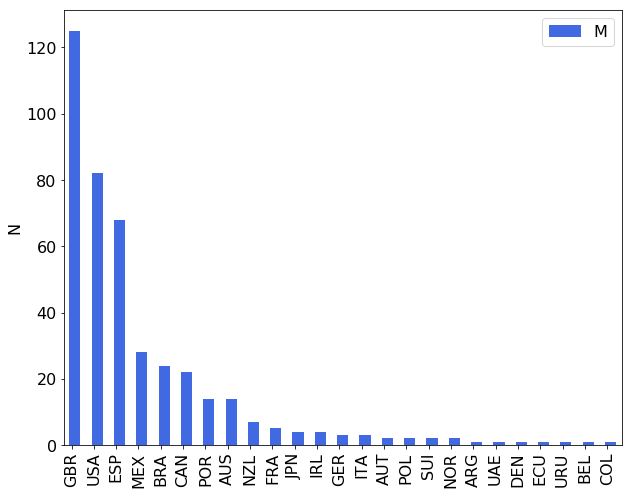

In [621]:
df_m['Country'].value_counts().plot(kind='bar', color=m_col, label='M', legend=True, position=0.2);
plt.gca().set_ylabel('N');

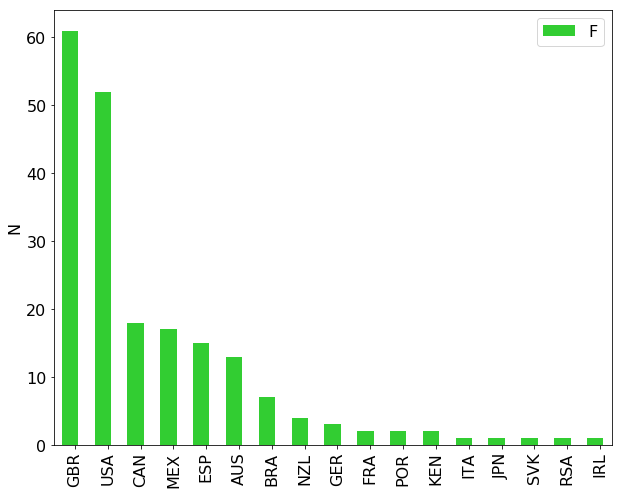

In [514]:
df_f['Country'].value_counts().plot(kind='bar', color=f_col, label='F', legend=True, position=0.8);
plt.gca().set_ylabel('N');

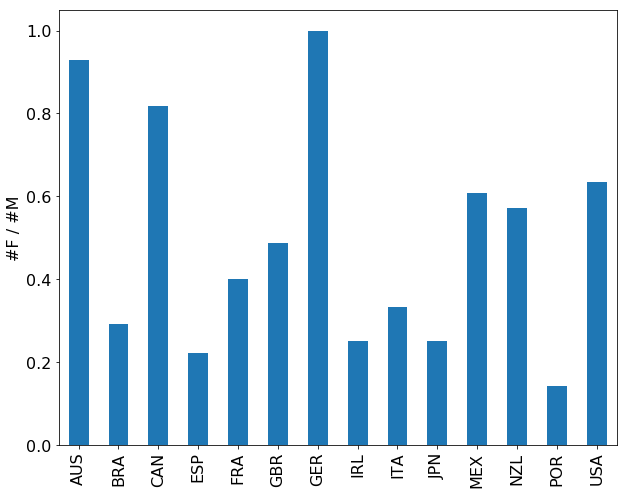

In [515]:
(df_f['Country'].value_counts() / df_m['Country'].value_counts()).dropna().plot(kind='bar');
plt.gca().set_ylabel('#F / #M');

In [516]:
def timeTicks(seconds, pos):
    d = datetime.timedelta(seconds=seconds)
    return str(d)

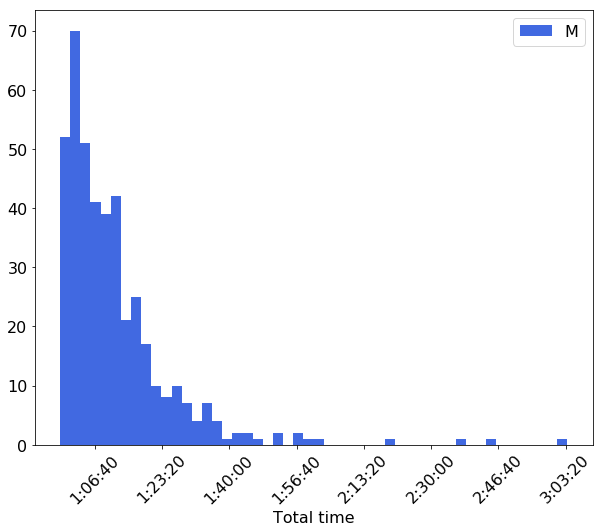

In [517]:
plt.hist(df_m['Total'], bins=50, label='M', color=m_col);
plt.legend();
plt.xlabel('Total time');
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);

In [556]:
np.sort(df_f['Category'].unique())[:6]

array(['16-19 Female', '20-24 Female', '25-29 Female', '30-34 Female',
       '35-39 Female', '40-44 Female'], dtype=object)

In [564]:
df_f['Category'].unique()

array(['45-49 Female', '35-39 Female', '20-24 Female', '40-44 Female',
       '25-29 Female', '30-34 Female', '16-19 Female', '50-54 Female',
       '55-59 Female', '60-64 Female', '65-69 Female', '70-74 Female',
       'Open Female', '80-84 Female', '75-79 Female'], dtype=object)

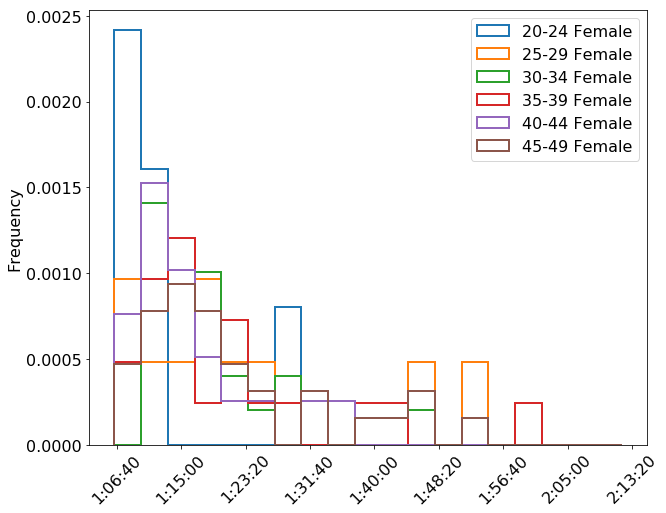

In [679]:
# mask = df_f['Category'].isin(np.sort(df_f['Category'].unique())[:6])
mask = df_f['Category'].isin(df_f['Category'].unique()[:6])
df_f[mask].groupby('Category')['Total'].plot(
    kind='hist', legend=True, 
    bins=np.linspace(df_f['Total'].min(), df_f['Total'].max(), 20), 
    histtype='step', stacked=True, linewidth=2, alpha=1, density=True,
);
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);

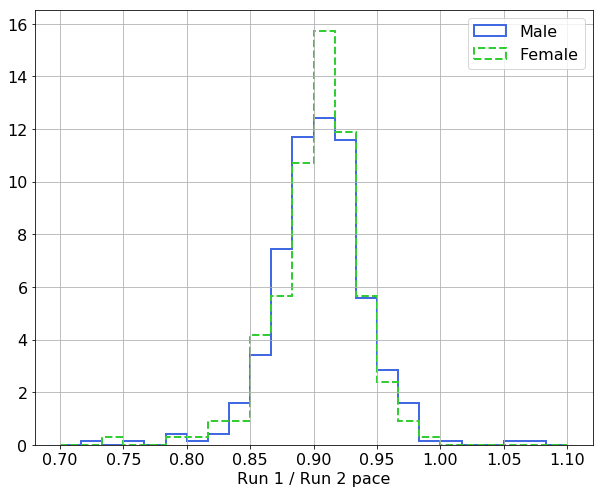

In [651]:
bins=np.linspace(0.7, 1.1, 25)
ax = df_m['Run12Ratio'].hist(bins=bins, label='Male', color=m_col, normed=True, histtype='step', linewidth=2);
df_f['Run12Ratio'].hist(ax=ax, bins=bins, label='Female', color=f_col, normed=True, histtype='step', linewidth=2, linestyle='--');
plt.xlabel('Run 1 / Run 2 pace');
plt.legend();

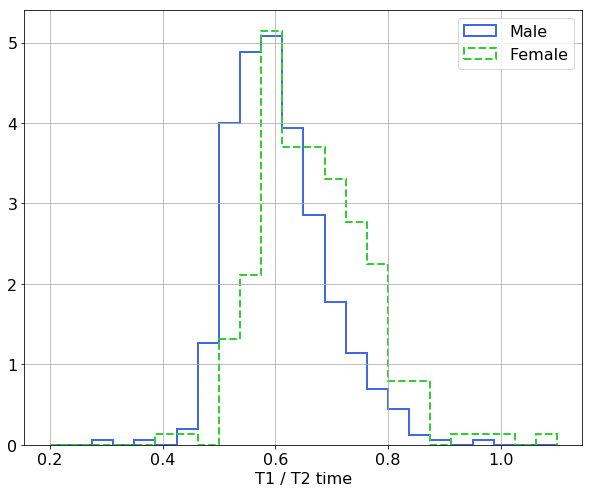

In [650]:
bins=np.linspace(0.2, 1.1, 25)
ax = (df_m['T1']/df_m['T2']).hist(bins=bins, label='Male', color=m_col, normed=True, histtype='step', linewidth=2);
(df_f['T1']/df_f['T2']).hist(ax=ax, bins=bins, label='Female', color=f_col, normed=True, histtype='step', linewidth=2, linestyle='--');
plt.xlabel('T1 / T2 time');
plt.legend();

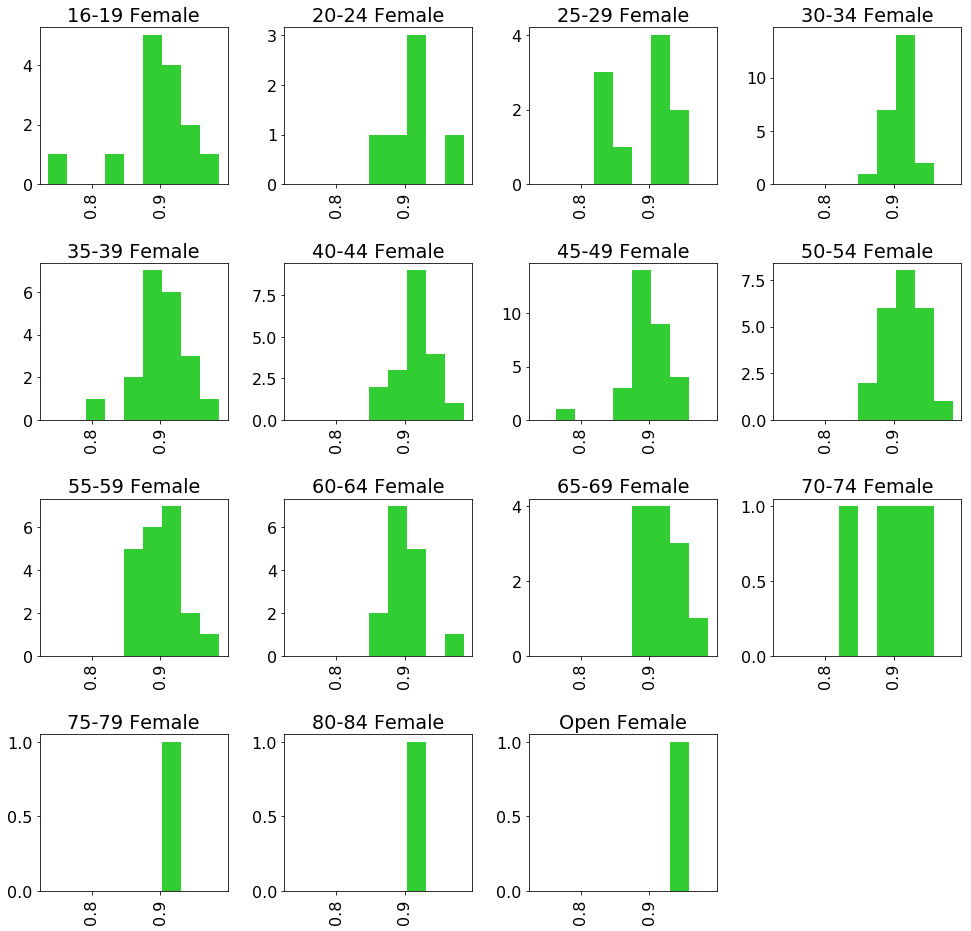

In [637]:
col = 'Run12Ratio'
thing = df_f[[col, 'Category']].hist(by='Category', bins=np.linspace(df_f[col].min(), df_f[col].max(), 10), figsize=(16, 16), color=f_col);
# for ax in thing.flatten():
#     ax.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
#     ax.set_xticks(rotation=45);

In [585]:
thing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128f85400>,
      dtype=object)

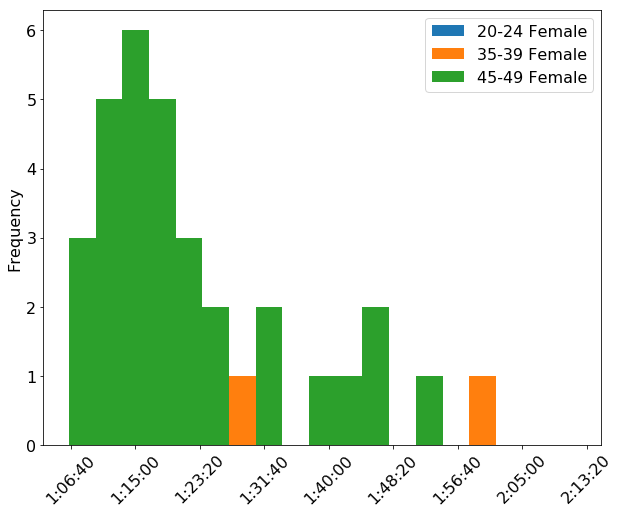

In [572]:
# mask = df_f['Category'].isin(np.sort(df_f['Category'].unique())[:6])
mask = df_f['Category'].isin(df_f['Category'].unique()[:3])
df_f[mask].groupby('Category')['Total'].plot.hist(
    legend=True, 
    bins=np.linspace(df_f['Total'].min(), df_f['Total'].max(), 20), 
    histtype='stepfilled', stacked=True, linewidth=2, alpha=1
);
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);

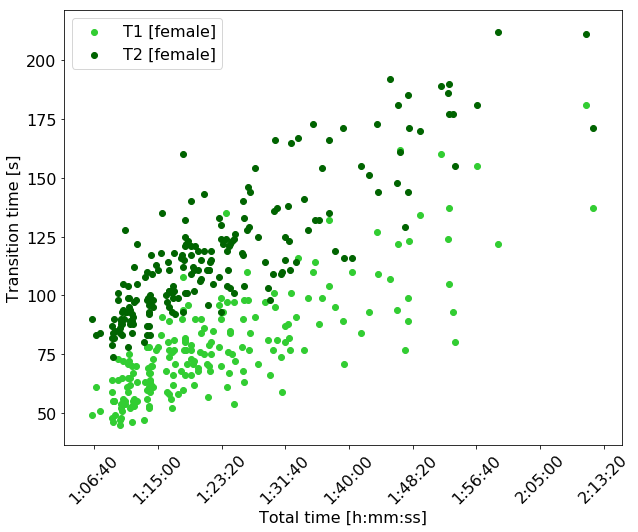

In [676]:
plt.scatter(df_f['Total'], df_f['T1'], color=f_col, label='T1 [female]')
plt.scatter(df_f['Total'], df_f['T2'], color='darkgreen', label='T2 [female]')
plt.legend();
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);
plt.xlabel('Total time [h:mm:ss]');
plt.ylabel('Transition time [s]');

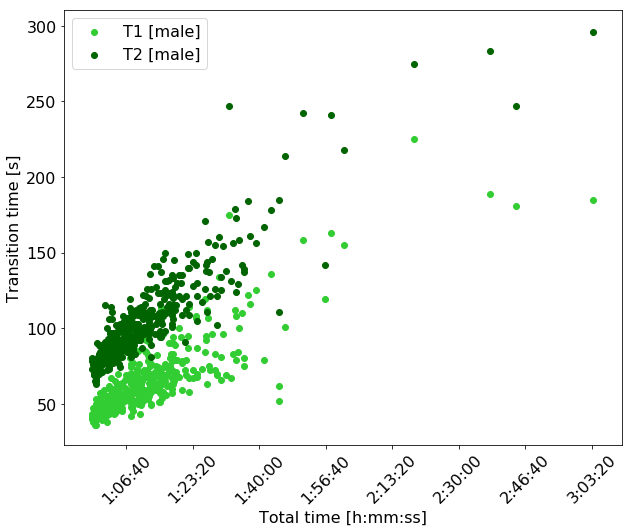

In [675]:
plt.scatter(df_m[df_m['T1']<600]['Total'], df_m[df_m['T1']<600]['T1'], color=f_col, label='T1 [male]')
plt.scatter(df_m[df_m['T1']<600]['Total'], df_m[df_m['T1']<600]['T2'], color='darkgreen', label='T2 [male]')
plt.legend();
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);
plt.xlabel('Total time [h:mm:ss]');
plt.ylabel('Transition time [s]');

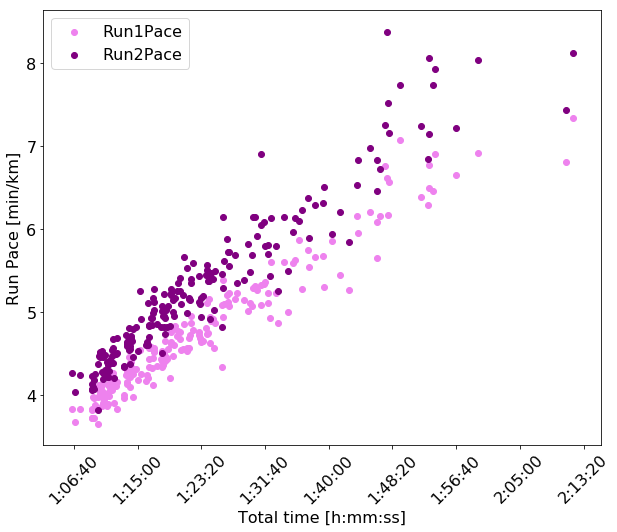

In [625]:
plt.scatter(df_f['Total'], df_f['Run1Pace'], color='violet', label='Run1Pace')
plt.scatter(df_f['Total'], df_f['Run2Pace'], color='purple', label='Run2Pace')
plt.legend();
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);
plt.xlabel('Total time [h:mm:ss]');
plt.ylabel('Run Pace [min/km]');

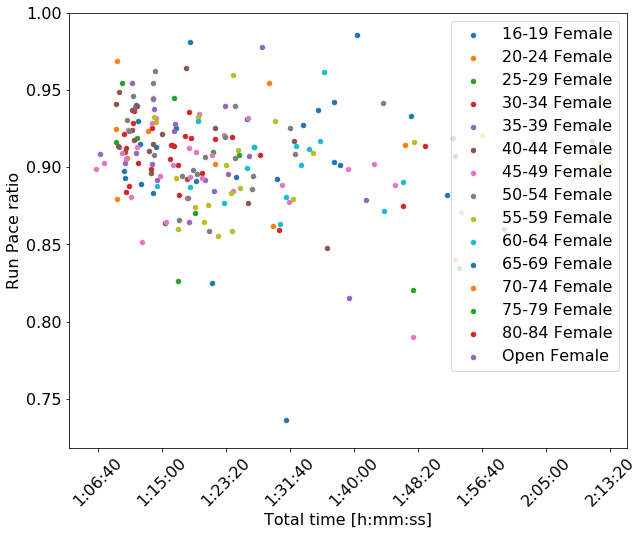

In [665]:
# plt.scatter(df_f['Total'], df_f['Run12Ratio'], color=df_f['Category'], label='Run1 Pace / Run 2 Pace')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']*2
for ind, g in enumerate(df_f.groupby('Category')):
#     print(g)
    g[1].plot.scatter(x='Total', y='Run12Ratio', label=g[0], ax=plt.gca(), c=colors[ind])
plt.legend();
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);
plt.xlabel('Total time [h:mm:ss]');
plt.ylabel('Run Pace ratio');

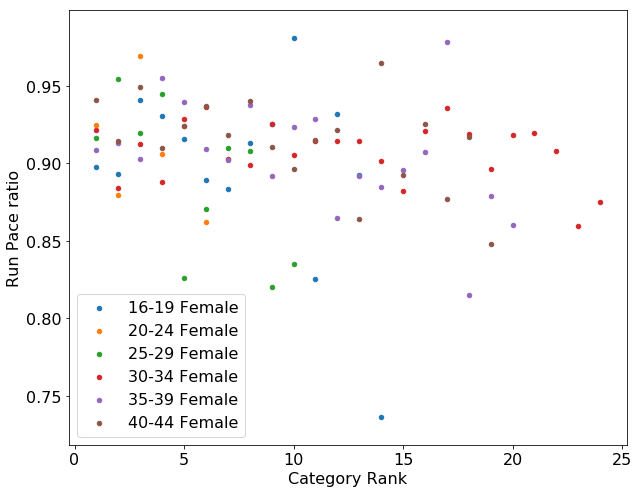

In [671]:
# plt.scatter(df_f['Total'], df_f['Run12Ratio'], color=df_f['Category'], label='Run1 Pace / Run 2 Pace')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']*2
for ind, g in enumerate(df_f.groupby('Category')):
    if ind == 6:
        break
#     print(g)
    g[1].plot.scatter(x='CategoryRank', y='Run12Ratio', label=g[0], ax=plt.gca(), c=colors[ind])
plt.legend();
plt.xlabel('Category Rank');
plt.ylabel('Run Pace ratio');

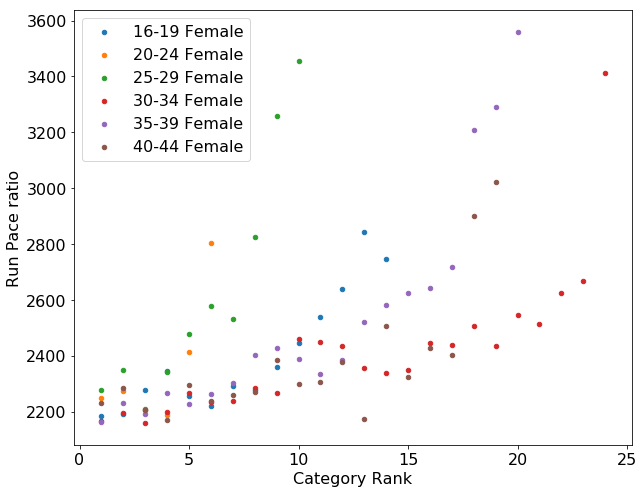

In [680]:
# plt.scatter(df_f['Total'], df_f['Run12Ratio'], color=df_f['Category'], label='Run1 Pace / Run 2 Pace')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']*2
for ind, g in enumerate(df_f.groupby('Category')):
    if ind == 6:
        break
#     print(g)
    g[1].plot.scatter(x='CategoryRank', y='Bike', label=g[0], ax=plt.gca(), c=colors[ind])
plt.legend();
plt.xlabel('Category Rank');
plt.ylabel('Run Pace ratio');

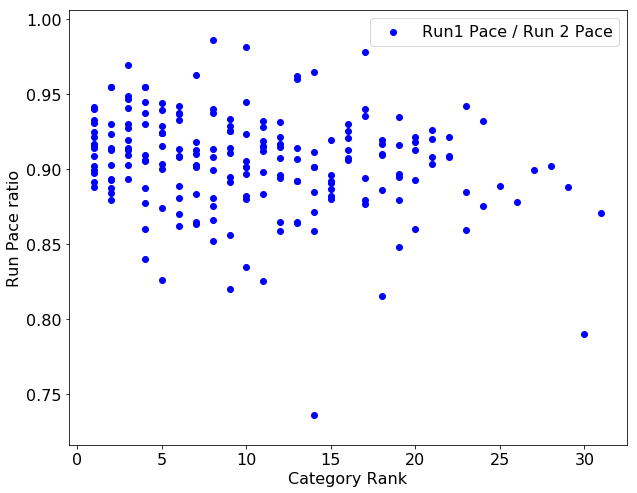

In [632]:
plt.scatter(df_f['CategoryRank'], df_f['Run12Ratio'], color='blue', label='Run1 Pace / Run 2 Pace')
plt.legend();
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
# plt.xticks(rotation=45);
plt.xlabel('Category Rank');
plt.ylabel('Run Pace ratio');

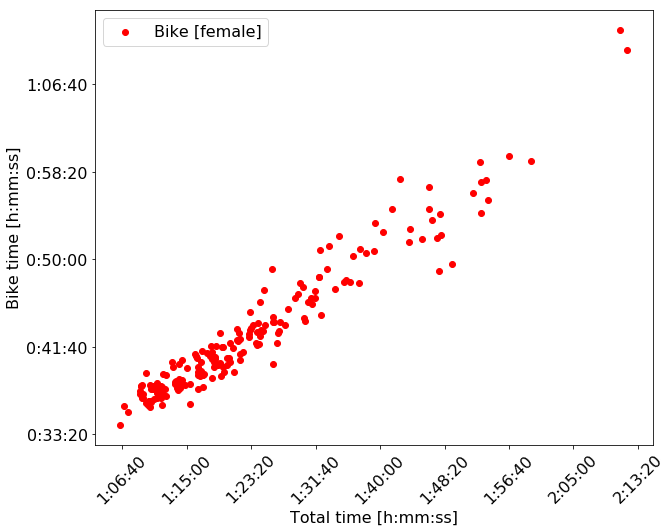

In [677]:
plt.scatter(df_f['Total'], df_f['Bike'], color='red', label='Bike [female]')
# plt.scatter(df_f['Total'], df_f['Run2Pace'], color='purple', label='Run2Pace')
plt.legend();
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);
plt.xlabel('Total time [h:mm:ss]');
plt.ylabel('Bike time [h:mm:ss]');

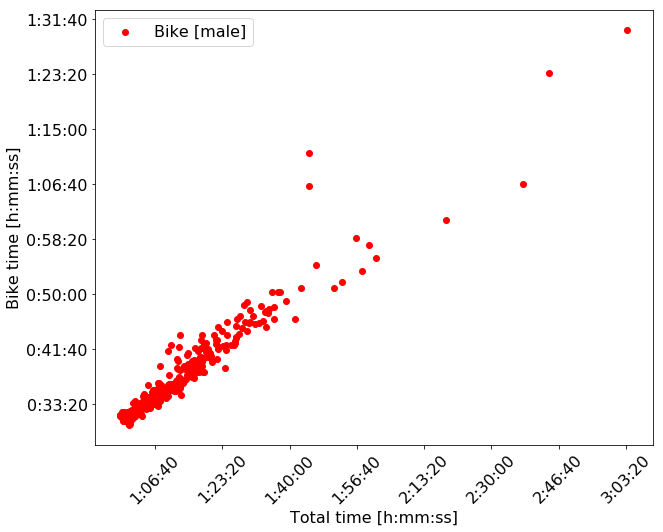

In [678]:
plt.scatter(df_m['Total'], df_m['Bike'], color='red', label='Bike [male]')
# plt.scatter(df_f['Total'], df_f['Run2Pace'], color='purple', label='Run2Pace')
plt.legend();
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);
plt.xlabel('Total time [h:mm:ss]');
plt.ylabel('Bike time [h:mm:ss]');

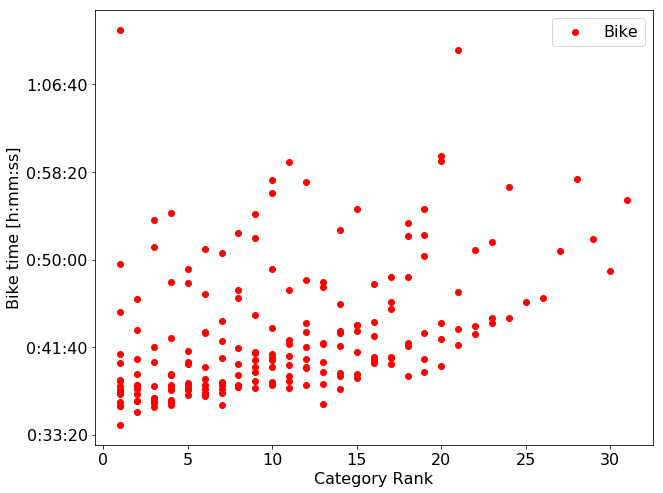

In [634]:
plt.scatter(df_f['CategoryRank'], df_f['Bike'], color='red', label='Bike')
plt.legend();
# plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
# plt.xticks(rotation=45);
# plt.xlabel('Total time [h:mm:ss]');
plt.xlabel('Category Rank');
plt.ylabel('Bike time [h:mm:ss]');

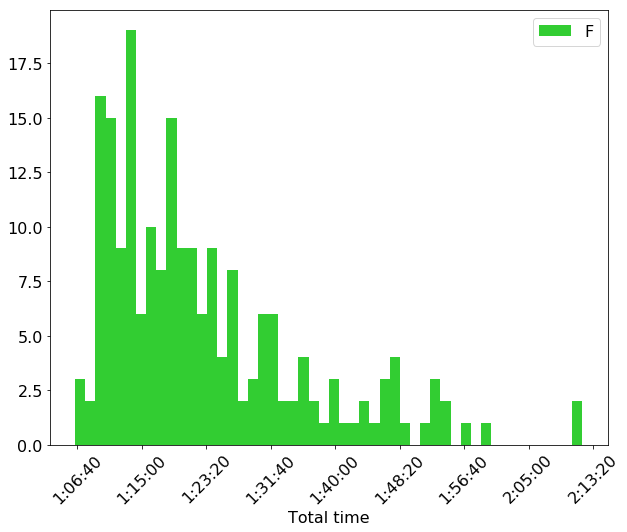

In [521]:
plt.hist(df_f['Total'], bins=50, label='F', color=f_col);
plt.legend();
plt.xlabel('Total time');
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));
plt.xticks(rotation=45);

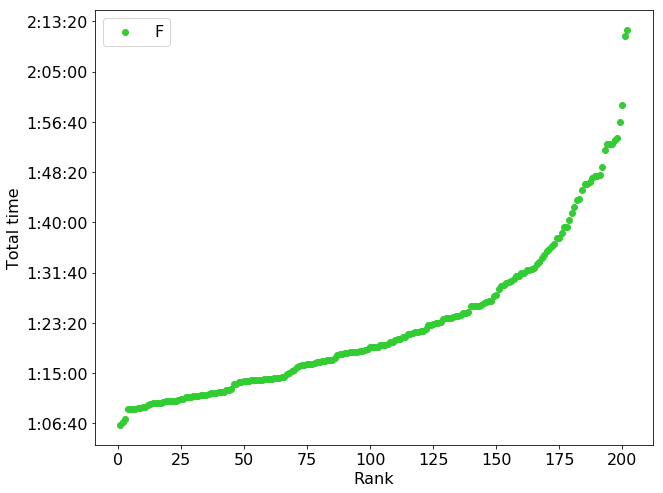

In [522]:
plt.scatter(df_f['Rank'], df_f['Total'], color=f_col, label='F');
plt.xlabel('Rank');
plt.ylabel('Total time');
plt.legend();
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));

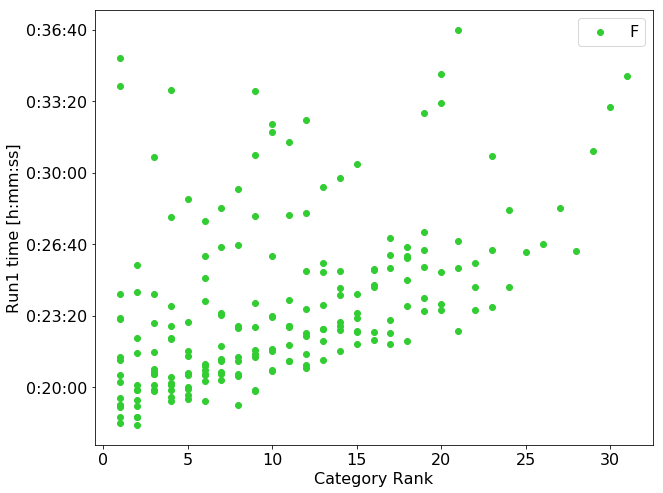

In [523]:
plt.scatter(df_f['CategoryRank'], df_f['Run1'], color=f_col, label='F');
plt.xlabel('Category Rank');
plt.ylabel('Run1 time [h:mm:ss]');
plt.legend();
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));

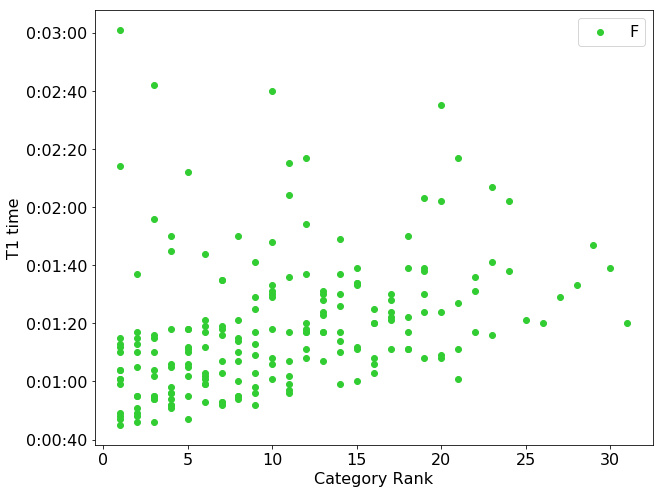

In [524]:
plt.scatter(df_f['CategoryRank'], df_f['T1'], color=f_col, label='F');
plt.xlabel('Category Rank');
plt.ylabel('T1 time');
plt.legend();
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));

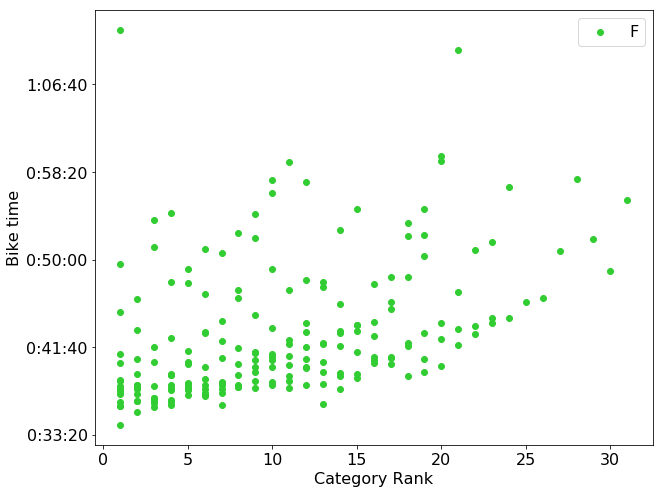

In [525]:
plt.scatter(df_f['CategoryRank'], df_f['Bike'], color=f_col, label='F');
plt.xlabel('Category Rank');
plt.ylabel('Bike time');
plt.legend();
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));

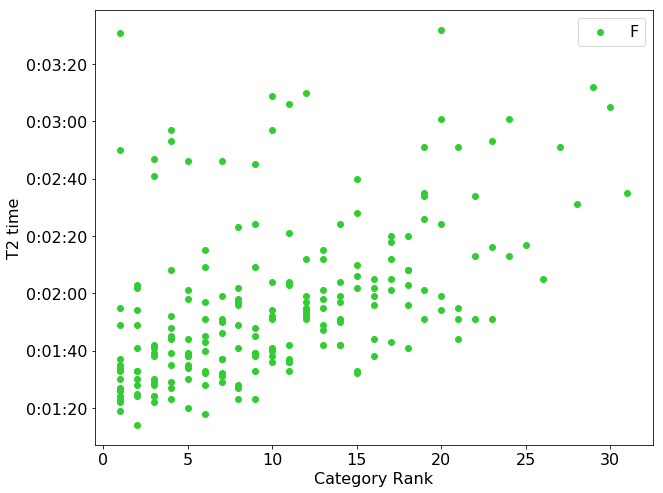

In [526]:
plt.scatter(df_f['CategoryRank'], df_f['T2'], color=f_col, label='F');
plt.xlabel('Category Rank');
plt.ylabel('T2 time');
plt.legend();
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));

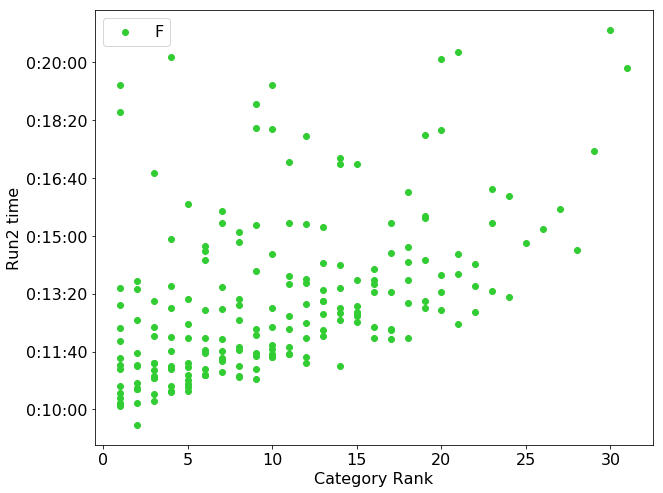

In [527]:
plt.scatter(df_f['CategoryRank'], df_f['Run2'], color=f_col, label='F');
plt.xlabel('Category Rank');
plt.ylabel('Run2 time');
plt.legend();
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(timeTicks));

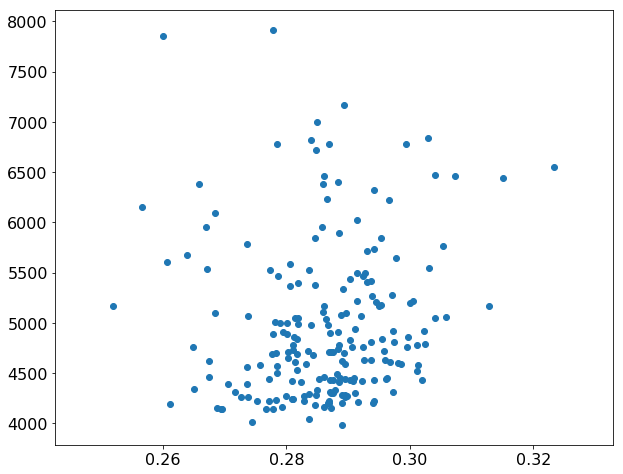

In [683]:
plt.scatter(df_f['Run1']/df_f['Total'], df_f['Total']);

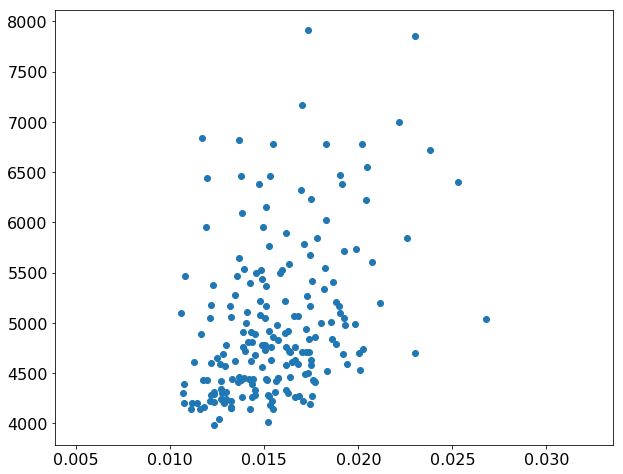

In [687]:
plt.scatter(df_f['T1']/df_f['Total'], df_f['Total']);

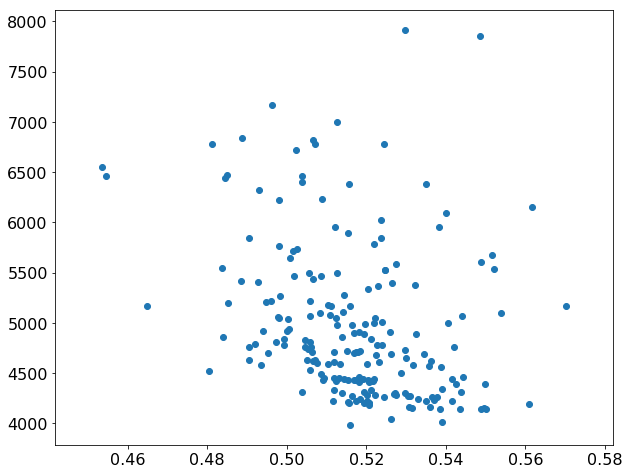

In [685]:
plt.scatter(df_f['Bike']/df_f['Total'], df_f['Total']);

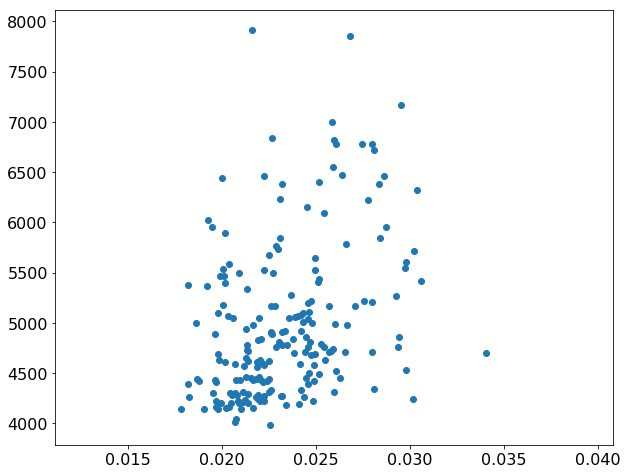

In [686]:
plt.scatter(df_f['T2']/df_f['Total'], df_f['Total']);

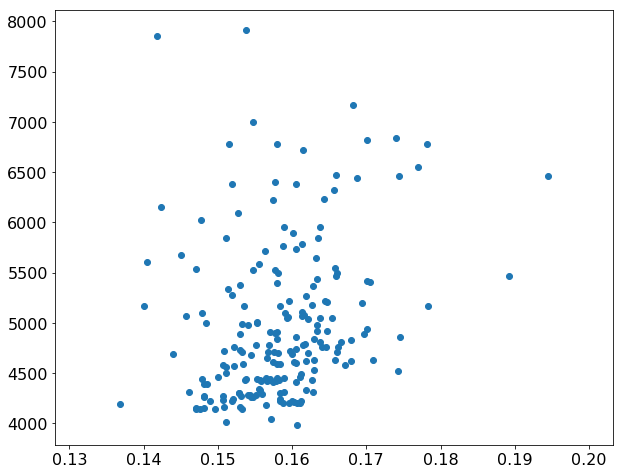

In [684]:
plt.scatter(df_f['Run2']/df_f['Total'], df_f['Total']);